<a href="https://colab.research.google.com/github/mehmetkayikcii/CSV-Based-Binary-Classification-with-Artificial-Neural-Networks/blob/main/YSA_3_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0 Loss 0.2329 Accuracy 64.96%
Iteration 100 Loss 0.1246 Accuracy 83.19%
Iteration 200 Loss 0.1223 Accuracy 83.28%
Iteration 300 Loss 0.1238 Accuracy 84.12%
Iteration 400 Loss 0.1260 Accuracy 83.36%
Iteration 500 Loss 0.1275 Accuracy 83.53%
Iteration 600 Loss 0.1292 Accuracy 83.70%
Iteration 700 Loss 0.1307 Accuracy 83.28%
Iteration 800 Loss 0.1320 Accuracy 83.28%
Iteration 900 Loss 0.1330 Accuracy 83.28%
Iteration 1000 Loss 0.1335 Accuracy 83.28%
Iteration 1100 Loss 0.1338 Accuracy 82.94%
Iteration 1200 Loss 0.1342 Accuracy 82.94%
Iteration 1300 Loss 0.1345 Accuracy 83.11%
Iteration 1400 Loss 0.1347 Accuracy 83.11%
Iteration 1500 Loss 0.1348 Accuracy 83.19%
Iteration 1600 Loss 0.1349 Accuracy 83.19%
Iteration 1700 Loss 0.1351 Accuracy 83.19%
Iteration 1800 Loss 0.1353 Accuracy 83.19%
Iteration 1900 Loss 0.1355 Accuracy 83.19%
Iteration 2000 Loss 0.1356 Accuracy 83.19%
Iteration 2100 Loss 0.1357 Accuracy 83.19%
Iteration 2200 Loss 0.1357 Accuracy 83.19%
Iteration 2300 Loss 0.1

<ipython-input-2-911ea3c11800>:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Iteration 3600 Loss 0.1357 Accuracy 83.45%
Iteration 3700 Loss 0.1358 Accuracy 83.45%
Iteration 3800 Loss 0.1358 Accuracy 83.45%
Iteration 3900 Loss 0.1358 Accuracy 83.45%
Iteration 4000 Loss 0.1358 Accuracy 83.45%
Iteration 4100 Loss 0.1358 Accuracy 83.45%
Iteration 4200 Loss 0.1358 Accuracy 83.45%
Iteration 4300 Loss 0.1358 Accuracy 83.45%
Iteration 4400 Loss 0.1358 Accuracy 83.45%
Iteration 4500 Loss 0.1358 Accuracy 83.61%
Iteration 4600 Loss 0.1358 Accuracy 83.61%
Iteration 4700 Loss 0.1358 Accuracy 83.61%
Iteration 4800 Loss 0.1358 Accuracy 83.53%
Iteration 4900 Loss 0.1358 Accuracy 83.53%
Iteration 5000 Loss 0.1358 Accuracy 83.53%
Iteration 5100 Loss 0.1358 Accuracy 83.53%
Iteration 5200 Loss 0.1358 Accuracy 83.53%
Iteration 5300 Loss 0.1359 Accuracy 83.53%
Iteration 5400 Loss 0.1359 Accuracy 83.53%
Iteration 5500 Loss 0.1359 Accuracy 83.53%
Iteration 5600 Loss 0.1359 Accuracy 83.53%
Iteration 5700 Loss 0.1359 Accuracy 83.53%
Iteration 5800 Loss 0.1359 Accuracy 83.53%
Iteration 5

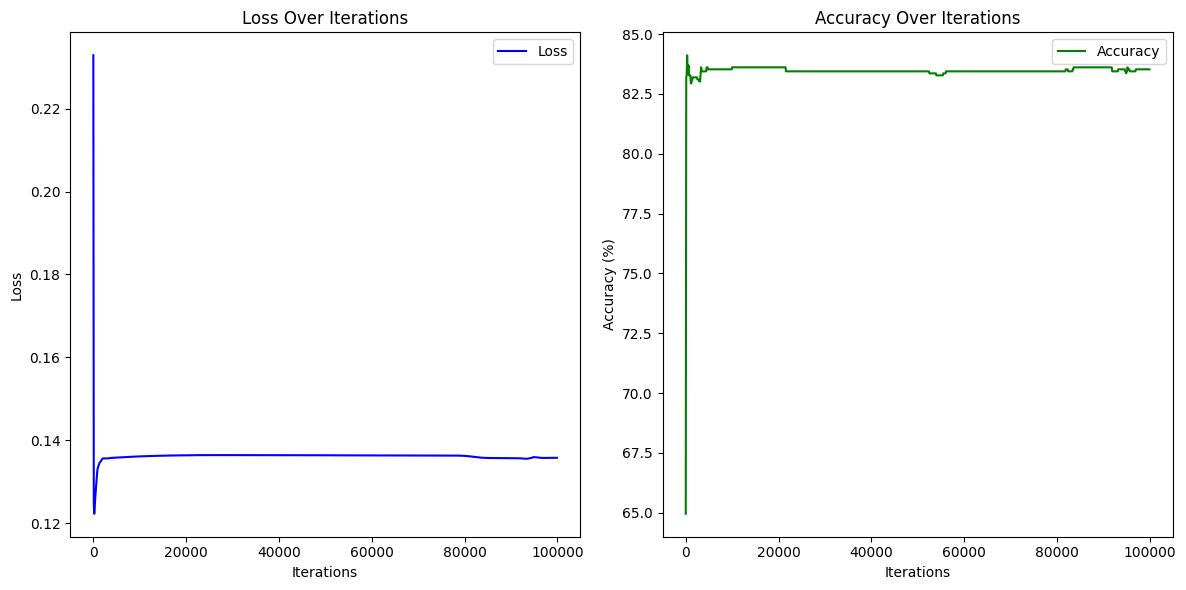

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def normalize(df):
    for column in df.columns:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Load data
data_path = 'heart_statlog_cleveland_hungary_final.csv'
data = pd.read_csv(data_path)

data = normalize(data.drop('target', axis=1))
data['target'] = pd.read_csv(data_path)['target']  # Reattach target without normalization

# Convert to numpy arrays
inputs = data.drop('target', axis=1).values
outputs = data['target'].values.reshape(-1, 1)  # Ensure outputs are the correct shape

input_size = inputs.shape[1]  # Number of input features
hidden_size = 5  # Adjust size of the hidden layer
output_size = 1  # Since this is a binary classification problem

weights1 = np.random.randn(input_size, hidden_size)
bias1 = np.zeros((1, hidden_size))
weights2 = np.random.randn(hidden_size, output_size)
bias2 = np.zeros((1, output_size))

# Training parameters
learning_rate = 0.01
iterations = 100000

# Lists to store loss and accuracy values
loss_list = []
accuracy_list = []

for i in range(iterations):
    # Forward pass
    hidden_layer_input = np.dot(inputs, weights1) + bias1
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights2) + bias2
    predicted_output = sigmoid(output_layer_input)

    # Backpropagation
    error = outputs - predicted_output
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Updating weights and biases
    weights2 += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    bias2 += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    weights1 += inputs.T.dot(d_hidden_layer) * learning_rate
    bias1 += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    if i % 100 == 0:
        loss = np.mean(np.square(outputs - predicted_output))
        predictions = predicted_output > 0.5  # Converting probabilities to class predictions (0 or 1)
        accuracy = np.mean(predictions == outputs)  # Calculating accuracy

        # Store the loss and accuracy for plotting
        loss_list.append(loss)
        accuracy_list.append(accuracy)

        print(f'Iteration {i} Loss {loss:.4f} Accuracy {accuracy * 100:.2f}%')

# Final accuracy on entire dataset
final_predictions = predicted_output > 0.5
final_accuracy = np.mean(final_predictions == outputs)
print(f'Final Accuracy: {final_accuracy * 100:.2f}%')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(0, iterations, 100), loss_list, label='Loss', color='blue')
plt.title('Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(0, iterations, 100), [acc * 100 for acc in accuracy_list], label='Accuracy', color='green')
plt.title('Accuracy Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()
